<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section_2_Project_modeling(tree_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리모델

In [1]:
# 라이브러리 설치
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders
!pip install pandas-profiling==3.1.0
# 해당 라이브러리 설치 후 런타임 다시 시작 -> 이후 셀 진행
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2afeaf2842fa841e8c665c1456c10798c01d6e9bd53870d5a19bd480aaf670cb
  Stored in directory: /root/.cache/pip/whee

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

데이터 불러오기

In [3]:
naver_shop = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/naver_shop_FE_comp.csv')

In [4]:
naver_shop 

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point,Brand Point,Price_range_score,Total Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1,3,2,7
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1,1,2,4
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0,0,2,2
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0,1,2,3
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16422,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1,3,2,7
16423,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16424,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0,3,2,6


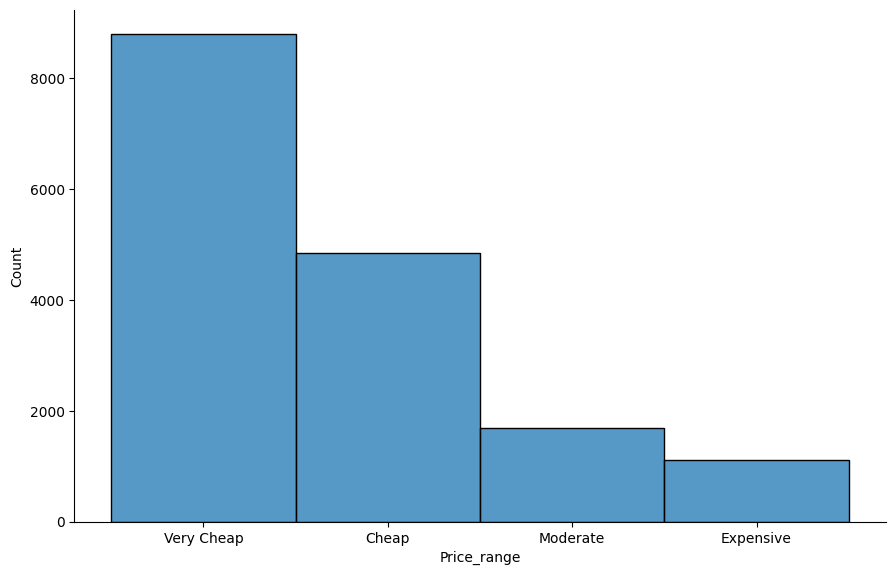

In [5]:
# 가격예측이 목적이므로 타겟은 Price_range	
target = 'Price_range'

# 타겟이 범주형데이터이므로 분류문제로 해결
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.displot(naver_shop[target])
fig.fig.set_size_inches(10,6)

In [6]:
naver_shop[target].value_counts(normalize=True)

Very Cheap    0.535614
Cheap         0.294594
Moderate      0.102460
Expensive     0.067332
Name: Price_range, dtype: float64

In [7]:
major = naver_shop[target].mode()[0]
pred = [major] * len(naver_shop[target])

In [8]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

# 기준모델의 평가지표
print("training accuracy: ", metrics.f1_score(naver_shop[target], pred,average ='weighted'))

training accuracy:  0.37363894291031574


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)

In [10]:
train.shape,test.shape

((11498, 14), (4928, 14))

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def divide_data(df):
    X = df.drop(['Price_range','Low price'], axis = 1)
    y = df['Price_range']
    return X, y

In [61]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [62]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(11498, 12) (11498,)
(4928, 12) (4928,)


In [63]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,average='weighted')
    recall = recall_score(y_test, pred,average='weighted')
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [65]:
import warnings
warnings.filterwarnings(action='ignore')

In [66]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# import any libraries needed

from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

def fit_rf(X_train, y_train):

    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),  
    RandomForestClassifier(class_weight = "balanced", random_state=42)
    )
    dists = {
    'randomforestclassifier__max_depth' : randint(1, 30),
    'randomforestclassifier__max_features' : randint(1, 10),
    'randomforestclassifier__n_estimators' : randint(1, 300)
    }
    clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1,
    random_state = 42
    )

    clf.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf.best_params_)

    return clf

In [68]:
clf_rf = fit_rf(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameter: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__n_estimators': 271}


In [69]:
pred_rf = clf_rf.predict(X_test)
get_clf_eval(y_test, pred_rf)
f1 = f1_score(y_test, pred_rf,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 969    0    0  483]
 [   0  183  149    0]
 [   0  211  294    0]
 [ 680    0    0 1959]]
정확도:0.6909496753246753, 정밀도:0.7020337890595111, 재현율:0.6909496753246753
f1 score : 0.6946013316368426


In [70]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [71]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
from catboost import CatBoostClassifier

def fit_cb(X_train, y_train):
    # YOUR CODE HERE
    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),  
    CatBoostClassifier(loss_function = 'MultiClass',class_weights=[0.619,0.818,0.916,0.953],early_stopping_rounds=35,verbose=100)
    )
    # YOUR CODE ENDS HERE
    pipe.fit(X_train, y_train)

    return pipe

In [73]:
clf_cb = fit_cb(X_train, y_train)

Learning rate set to 0.089622
0:	learn: 1.2597099	total: 24.3ms	remaining: 24.3s
100:	learn: 0.4971184	total: 1.74s	remaining: 15.5s
200:	learn: 0.4711228	total: 3s	remaining: 11.9s
300:	learn: 0.4543544	total: 4s	remaining: 9.3s
400:	learn: 0.4404047	total: 6.89s	remaining: 10.3s
500:	learn: 0.4294844	total: 11.2s	remaining: 11.2s
600:	learn: 0.4199668	total: 14.3s	remaining: 9.52s
700:	learn: 0.4104665	total: 17.3s	remaining: 7.37s
800:	learn: 0.4018178	total: 20.2s	remaining: 5.01s
900:	learn: 0.3940782	total: 23.3s	remaining: 2.56s
999:	learn: 0.3871084	total: 27.4s	remaining: 0us


In [74]:
pred_cb = clf_cb.predict(X_test)
get_clf_eval(y_test, pred_cb)
f1 = f1_score(y_test, pred_cb,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 614    0    0  838]
 [   0  127  205    0]
 [   0  145  360    0]
 [ 314    0    0 2325]]
정확도:0.695211038961039, 정밀도:0.685330882401562, 재현율:0.695211038961039
f1 score : 0.6784969265325614


In [75]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [76]:
# XGBClassifier
from sklearn.utils import class_weight
from xgboost import XGBClassifier

def fit_xg(X_train, y_train):

    processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
    )
    X_train_processed = processor.fit_transform(X_train)

    classes_weights = class_weight.compute_sample_weight(
        class_weight='balanced',
        y=y_train_encoded
    )
    
    clf = XGBClassifier(eval_metric='mlogloss',max_depth = 21,n_estimators = 190)
    clf.fit(X_train_processed, y_train_encoded, sample_weight=classes_weights)

    return clf

In [77]:
clf_xg = fit_xg(X_train, y_train)

In [78]:
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
    )
X_test_processed = processor.fit_transform(X_test)

pred_xg = clf_xg.predict(X_test_processed)

get_clf_eval(y_test_encoded, pred_xg)

f1 = f1_score(y_test_encoded, pred_xg,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 322    0    0 1130]
 [   0   59  273    0]
 [   0  116  389    0]
 [ 461    0    0 2178]]
정확도:0.5982142857142857, 정밀도:0.5566807481483583, 재현율:0.5982142857142857
f1 score : 0.5611423518794664


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
df_by_group = pd.DataFrame(columns=['model 1', 'f1'])

In [110]:
data_to_insert = {'model 1': 'baseline','f1': 0.37363}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [111]:
data_to_insert = {'model 1': 'RandomForestClassifier','f1': 0.69460}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [112]:
data_to_insert = {'model 1': 'CatBoostClassifier','f1': 0.67849}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [113]:
data_to_insert = {'model 1': 'XGBClassifier','f1': 0.56114}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'baseline'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'CatBoostClassifier'),
  Text(3, 0, 'XGBClassifier')])

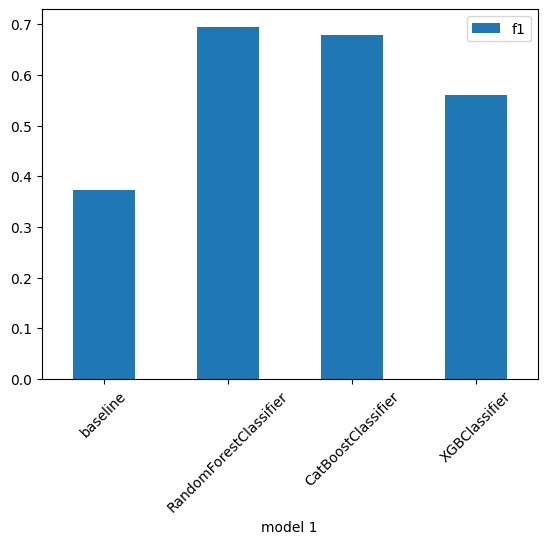

In [114]:
df_by_group.plot.bar(x='model 1',y='f1',rot=0)
plt.xticks(rotation=45)

In [85]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'),
    CatBoostClassifier(loss_function = 'MultiClass',class_weights=[0.619,0.818,0.916,0.953],early_stopping_rounds=35,verbose=100)
)

# 5-fold 교차검증을 수행합니다.
k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring=make_scorer(f1_score,average ='weighted'))

print(f'f1 ({k} folds):', scores)

Learning rate set to 0.088608
0:	learn: 1.2582501	total: 15.5ms	remaining: 15.5s
100:	learn: 0.4903357	total: 999ms	remaining: 8.89s
200:	learn: 0.4620035	total: 1.95s	remaining: 7.74s
300:	learn: 0.4428015	total: 2.83s	remaining: 6.58s
400:	learn: 0.4283029	total: 3.72s	remaining: 5.55s
500:	learn: 0.4164772	total: 5.49s	remaining: 5.46s
600:	learn: 0.4057622	total: 7.99s	remaining: 5.31s
700:	learn: 0.3959295	total: 9.3s	remaining: 3.97s
800:	learn: 0.3870560	total: 10.2s	remaining: 2.54s
900:	learn: 0.3791213	total: 11.1s	remaining: 1.22s
999:	learn: 0.3719180	total: 11.9s	remaining: 0us
Learning rate set to 0.088608
0:	learn: 1.2624726	total: 9.07ms	remaining: 9.06s
100:	learn: 0.4948359	total: 895ms	remaining: 7.96s
200:	learn: 0.4660643	total: 1.79s	remaining: 7.13s
300:	learn: 0.4478951	total: 2.68s	remaining: 6.22s
400:	learn: 0.4326700	total: 3.56s	remaining: 5.32s
500:	learn: 0.4191189	total: 4.43s	remaining: 4.41s
600:	learn: 0.4086607	total: 5.29s	remaining: 3.51s
700:	lear

In [87]:
scores.mean()

0.6646035088568178

In [88]:
scores.std()
# Variance가 작다는 것은 모델 complexity에 비해 sample수가 많다

0.06400244299894976

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {'fold1': ['fold1', 'fold2', 'fold3', 'fold4', 'fold5'], 'f1': [0.5370311  ,0.69359972 ,0.70299793 ,0.68833011, 0.70105868]}
df_by_fold = pd.DataFrame(data=data)

<Axes: xlabel='fold1'>

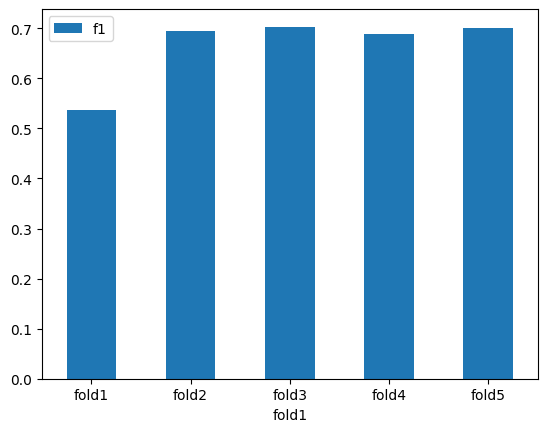

In [117]:
df_by_fold.plot.bar(x='fold1',y='f1',rot=0)

In [91]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [118]:
from catboost import CatBoostClassifier

def fit_cb(X_train, y_train):
    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),  
    CatBoostClassifier(loss_function = 'MultiClass',early_stopping_rounds=35,verbose=100)
    )

    pipe.fit(X_train, y_train)

    return pipe

In [119]:
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
    )
X_train_processed = processor.fit_transform(X_train)

res_clf = CatBoostClassifier(loss_function = 'MultiClass',class_weights=[0.622,0.77,0.928,0.928],early_stopping_rounds=35,verbose=100)

res_clf.fit(X_train_processed,y_train)

Learning rate set to 0.089622
0:	learn: 1.2605152	total: 79.2ms	remaining: 1m 19s
100:	learn: 0.4990752	total: 3.6s	remaining: 32s
200:	learn: 0.4740569	total: 4.61s	remaining: 18.3s
300:	learn: 0.4567591	total: 5.58s	remaining: 13s
400:	learn: 0.4429811	total: 6.57s	remaining: 9.81s
500:	learn: 0.4315754	total: 7.52s	remaining: 7.49s
600:	learn: 0.4218073	total: 8.52s	remaining: 5.66s
700:	learn: 0.4122312	total: 9.54s	remaining: 4.07s
800:	learn: 0.4031213	total: 10.5s	remaining: 2.61s
900:	learn: 0.3958453	total: 11.5s	remaining: 1.26s
999:	learn: 0.3886735	total: 12.5s	remaining: 0us


In [120]:
res_clf.get_feature_importance()

array([ 4.68944666,  2.26153422,  0.40292482,  2.21354331,  5.9942892 ,
        0.55990975,  4.70538642,  7.43096981,  0.15986916,  1.85452511,
       67.17568883,  2.55191272])

In [121]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

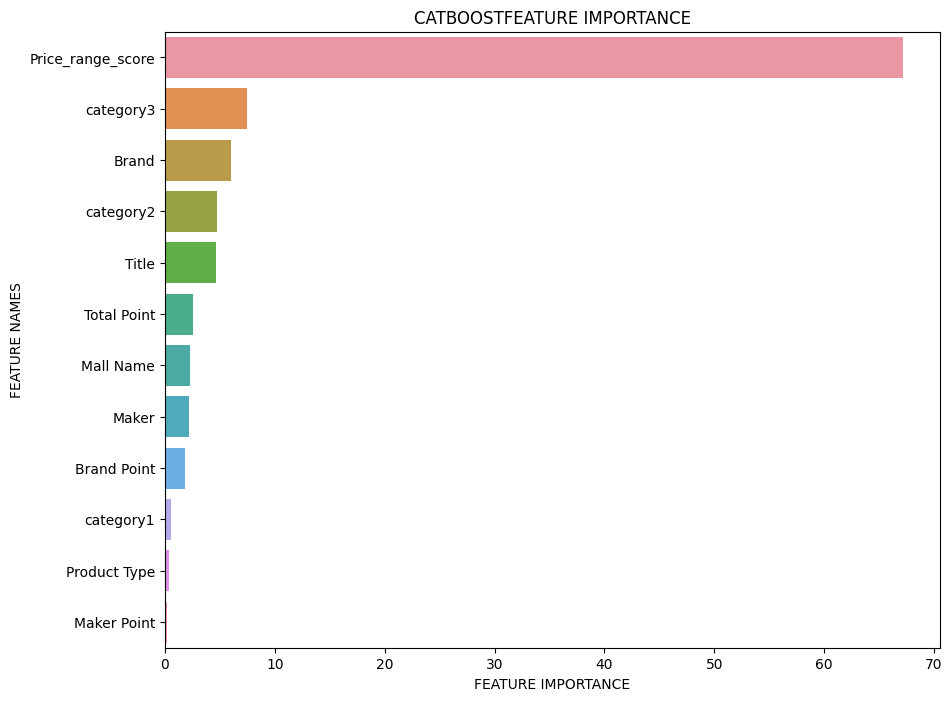

In [122]:
plot_feature_importance(res_clf.get_feature_importance(),X_train.columns,'CATBOOST')

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_by_feature = pd.DataFrame(columns=['Low price',
'Price_range_score',
'Brand',
'category3',
'Title',
'category2',
'maker',
'Total Point',
'Mall Name',
'Maker Point',
'category1',
'Product Type'
])

In [124]:
row = [ 9.42506961,  3.8843528 ,  3.6941246 , 18.29352653, 13.32113064,
       12.2050236 , 12.24629638,  3.98242717,  3.26797755,  3.67377797,
        3.28963557, 12.71665759]
row.sort(reverse=True)

In [125]:
df_by_feature = df_by_feature.append(pd.Series(row, index=df_by_feature.columns), ignore_index=True)

In [126]:
df_by_feature = df_by_feature.T

In [127]:
df_by_feature = df_by_feature.reset_index()

In [128]:
df_by_feature

,index,0
0,Low price,18.293527
1,Price_range_score,13.321131
2,Brand,12.716658
3,category3,12.246296
4,Title,12.205024
5,category2,9.425070
6,maker,3.982427
7,Total Point,3.884353
8,Mall Name,3.694125
9,Maker Point,3.673778


<Axes: xlabel='0', ylabel='index'>

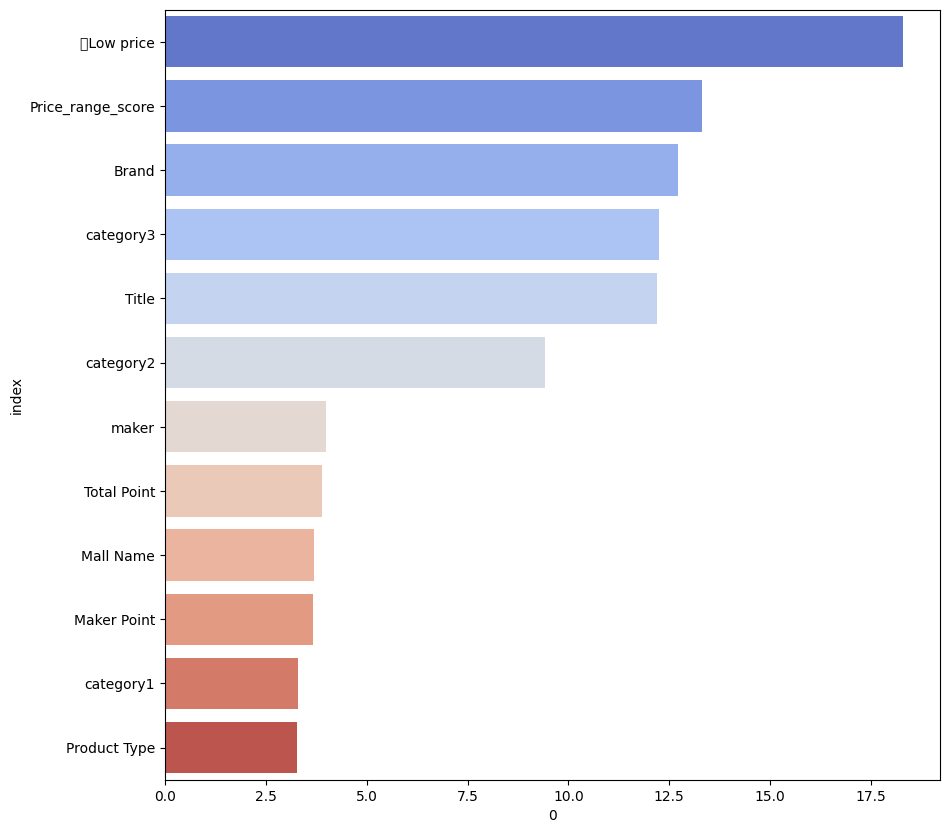

In [103]:
plt.figure(figsize=(10, 10))
sns.barplot(x=0,y='index',data=df_by_feature,palette=sns.color_palette('coolwarm',12))